In [1]:
%load_ext autoreload
%autoreload 2



In [2]:
import logging.config
logging.config.fileConfig('../logging.ini', disable_existing_loggers=False)

#hack for importing from sibling dirs
import context 

import matplotlib.pyplot as plt
%matplotlib inline

# history-of-poland (depth 10) -> ~5325 nodes
CAT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201'
DICT_PATH = '../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201'



In [3]:
from cat2vec.assessment.assessment_saver.local_assessment_saver import LocalAssessmentSaver
from cat2vec.assessment.embeddings_assessor import EmbeddingsAssessor, AssessmentConfig
from cat2vec.embedding.sdne.sdne import SDNE



In [4]:
model = SDNE(embedding_size=300, additional_hidden_layers_shapes=[500], use_leaky_relu=False)

saver = LocalAssessmentSaver(cvs_path=r'C:\Users\Jan\Desktop\neural-embeddings\tmp\results.csv',
                             dst_path=r'C:\Users\Jan\Desktop\neural-embeddings\tmp\data')

assessor = EmbeddingsAssessor(model=model,
                              assessment_saver=saver,
                              cat_path=CAT_PATH,
                              dict_path=DICT_PATH,
                              root_node='History_of_Poland')



2019-06-13 21:22:36,518 - cat2vec.graph.loader - INFO - Loading graph from matrix' files: ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-cats_links-en-20111201, ../../wiki-graph/hist_of_poland-10h/history-of-poland-10-po_linkach-cats_dict-en-20111201
2019-06-13 21:22:36,675 - cat2vec.graph.loader - INFO - Cleaning graph
2019-06-13 21:22:36,682 - cat2vec.graph.loader - INFO - Loaded graph with 5325 nodes and 7501 edges


In [6]:
assessor.fit(epochs=50,
                 learning_rate=0.000006,  # 0.000024 00000417
                 batch_size=32,
                 regularization=0.1,
                 beta=50,
                 loss1_weight=0.20,
                 loss2_weight=1)

2019-06-13 21:23:11,133 - cat2vec.assessment.embeddings_assessor - INFO - Training 'sdne_v1' without random walks
2019-06-13 21:23:11,134 - cat2vec.embedding.sdne.sdne - INFO - Train config: {'epochs': 50, 'learning_rate': 6e-06, 'batch_size': 32, 'regularization': 0.1, 'beta': 50, 'loss1_weight': 0.2, 'loss2_weight': 1, 'additional_layers': [500], 'embeddings size': 300}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_x (InputLayer)         (1, None, 5325)           0         
_________________________________________________________________
encoder_0 (Dense)            (1, None, 5325)           28360950  
_________________________________________________________________
encoder_1 (Dense)            (1, None, 500)            2663000   
_________________________________________________________________
encoder_2 (Dense)            (1, None, 300)            150300    
_______________________________

[4002.201070556641,
 3776.4956066894533,
 3606.116943359375,
 3463.471510620117,
 3341.8253063964844,
 3239.3657342529295,
 3151.867872314453,
 3076.9568505859374,
 3014.8834271240235,
 2961.566347961426,
 2919.017502746582,
 2883.244114379883,
 2854.7482705688476,
 2830.6017947387695,
 2809.702056274414,
 2795.437784729004,
 2780.9752529907228,
 2770.055774536133,
 2760.9633407592773,
 2749.6910247802734,
 2743.652035217285,
 2739.6353466796877,
 2736.2412365722657,
 2732.002173461914,
 2728.817677307129,
 2725.321555175781,
 2723.2568218994143,
 2721.537692565918,
 2718.380954589844,
 2718.095982055664,
 2717.0235339355468,
 2715.9321453857424,
 2713.288107910156,
 2713.869454040527,
 2712.7663256835935,
 2711.566789855957,
 2711.2795822143553,
 2708.8299105834963,
 2710.6472174072264,
 2708.2433349609373,
 2707.3958865356444,
 2708.118305053711,
 2706.4549298095703,
 2705.3566970825195,
 2705.6989126586914,
 2703.303962097168,
 2704.370365600586,
 2701.615295715332,
 2705.1106546020

In [7]:
metrics = AssessmentConfig() \
        .with_edges_prediction(negative_edges_per_node=5, print_erroneous_edges=False)
assessor.assess_model(save_results=False, config=metrics)


2019-06-13 21:31:34,435 - cat2vec.assessment.embeddings_assessor - INFO - Assessing 'sdne_v1' using metrics: [<Metrics.EDGES_PREDICTION: 2>]
2019-06-13 21:31:35,926 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - Edges prediction accuracy (AVERAGE): {"True positive": "0 (0.0)", "False negative": "3751 (1.0)", "True negative": "13313 (1.0)", "False positive": "0 (0.0)", "Recall": 0.0}
2019-06-13 21:31:37,412 - cat2vec.assessment.metrics.edges_prediction_accuracy - INFO - Edges prediction accuracy (HADAMARD): {"True positive": "0 (0.0)", "False negative": "3751 (1.0)", "True negative": "13313 (1.0)", "False positive": "0 (0.0)", "Recall": 0.0}


{'EDGES_PREDICTION': {'AVERAGE': {'True positive': '0 (0.0)',
   'False negative': '3751 (1.0)',
   'True negative': '13313 (1.0)',
   'False positive': '0 (0.0)',
   'Recall': 0.0},
  'HADAMARD': {'True positive': '0 (0.0)',
   'False negative': '3751 (1.0)',
   'True negative': '13313 (1.0)',
   'False positive': '0 (0.0)',
   'Recall': 0.0}}}

In [8]:
W = model.get_embeddings()


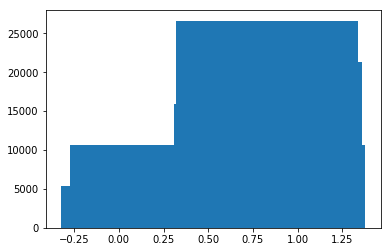

In [9]:
import numpy as np

hist, bin_edges = np.histogram(W, bins=1000)

plt.bar(bin_edges[:-1], hist, width = 1)
plt.savefig('sdne-sigmoid-full-histogram.png')
plt.show() 


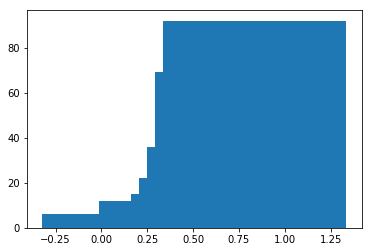

In [10]:
hist_single, bin_edges_single = np.histogram(W[0], bins='auto')

plt.bar(bin_edges_single[:-1], hist_single, width = 1)
plt.savefig('sdne-sigmoid-single-histogram.png')
plt.show() 
